<div class = "alert alert-warning">
Ce fichier  est un notebook Python.

Il comporte deux types de cellules :

* les cellules d'édition dans lesquelles vous pouvez saisir du texte éventuellement enrichi de mises en formes ou de liens hypertextes avec la syntaxe du langage HTML simplifié qui s'appelle Markdown. Voir http://daringfireball.net/projects/markdown/ pour la syntaxe de Markdown.

* les cellules de code où l'on peut saisir du code Python3 puis le faire exécuter avec la combinaison de touches `CTRL + RETURN`

Une cellule peut être éditée  de deux façons différentes :

* en mode _commande_ lorsqu'on clique sur sa marge gauche qui est surlignée alors en bleu, on peut alors  :

    - changer le type de la cellule en appuyant sur `m` pour passer en cellule Markdown ou sur `y` pour passer en cellule de code
    
    - insérer une cellule juste au-dessus en appuyant sur `a`
    
    - insérer une cellule juste en-dessous en appuyant sur `b`
    
    - couper la cellule en appuyant sur `x` etc ...
    
* en mode _édition_ lorsqu'on clique sur l'intérieur de la cellule.

L'aide complète sur les raccourcis claviers est accessible depuis le bouton `Help` dans la barre d'outils ci-dessus.
<div>

# Fonctions outils

In [1]:
#%% Imports de bibliothèques


from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


#%% Outils fournis


def dimensions(pix):
    """Retourne les dimensions (Largeur, Hauteur) d'une matrice
    de pixels"""
    return len(pix[0]), len(pix) 

def matrice_to_image(pix, mode = '1', fichier='image.png', res=1):
    """Convertit en image  une matrice de pixels pix 
    de dimensions (ligne, colonnes)=(nline, ncol)
    en représentant sur l'écran chaque case de pix
    par un carré de coté resolution pixels.
    Le mode de l'image peut être :
    '1'  : binaire 0 ou 1
    'L' : niveaux de gris entre 0 et 255
    'RGB' : triplet de valeurs (Rouge, Vert, Bleu) entre 0 et 255
    Renvoie un objet image (format PIL)
    """
    #on force la conversion en type np.uint8 si pix est un tableau numpy
    if isinstance(pix, np.ndarray):
        pix = pix.astype(np.uint8)
    #précondition 1 : list doit être une matrice de pixels
    precondition1 = isinstance(pix, (list, np.ndarray))                    and len(pix) > 0                 and all(isinstance(pix[k], (list, np.ndarray))                         and  len(pix[k]) == len(pix[0])                          for k in range(len(pix)))
    assert precondition1, "Il faut passer en paramètre une matrice de pixels"
    #dimensions de la matrice de pixels
    largeur_pix, hauteur_pix = dimensions(pix)
    #préconditions sur la matrice de pixels pour respecter les contraintes du mode de l'image 
    precondition2 =  mode == '1' and                     all(isinstance(pix[y][x], (int, np.uint8)) and 0 <= pix[y][x] <= 1                         for y in range(hauteur_pix) for x in range(largeur_pix))
    precondition3 =  mode == 'L' and                     all(isinstance(pix[y][x], (int, np.uint8)) and 0 <= pix[y][x] <= 255                         for y in range(hauteur_pix) for x in range(largeur_pix))
    precondition4 = mode == 'RGB' and                     all(isinstance(pix[y][x], (list, np.ndarray))                         and len(pix[y][x]) == 3                         and  all(isinstance(pix[y][x][k], (int, np.uint8))                                  and 0 <= pix[y][x][k] <= 255                             for k in range(3))                         for y in range(hauteur_pix) for x in range(largeur_pix))
    assert precondition2 or precondition3 or precondition4, "matrice de pixels et mode incompatibles !"    
    #dimensions de la matrice de pixels
    hauteur_newpix, largeur_newpix = res * hauteur_pix, res * largeur_pix
    #copie de pix sous forme de tableau numpy agrandi d'un coefficient res 
    if mode != 'RGB':
        newpix =  np.zeros((hauteur_newpix, largeur_newpix), dtype='uint8')
    else:
        newpix =  np.zeros((hauteur_newpix, largeur_newpix, 3), dtype='uint8')
    #initialsation des blocs de taille res * res de newpix
    #avec des 0 si pix[i][j] == 0 et 1 sinon
    for y in range(hauteur_newpix):
        for x in range(largeur_newpix):
            ypix = y // res
            xpix = x // res
            newpix[y][x] = pix[ypix][xpix]   
    if mode != 'RGB':
        #création d'un objet image PIL en mode binaire (pixel de valeur 0 ou 1)
        im = Image.new(mode, (largeur_newpix, hauteur_newpix))  #Image.new(mode, (Largeur, Hauteur))  
        #on remplit l'image avec les valeurs de newpix
        im.putdata(newpix.flatten())
    else:
        im = Image.fromarray(newpix)
    #enregistrement de l'image sur le disque 
    im.save(fichier)
    #renvoie l'image
    return im
    
def image_to_matrice(fichier):
    """
    Prend en paramètre le chemin vers un fichier image
    Renvoie sa représentation sous forme de matrice de pixels    
    """
    #ouverture de l'image avec PIL
    im = Image.open(fichier)
    #conversion de l'image en matrice de pixels / tableau numpy
    pix = np.array(im, dtype = np.uint8)
    #conversion de la matrice de pixels en liste Python
    pix = pix.tolist()
    return pix

def matrice_nulle(ncol, nlig, mode = "L"):
    """Retourne une matrice de pixels de n lignes et m colonnes
    représentant une image noire dans le mode  d'image choisi"""
    assert mode in ['1', 'L', 'RGB'], "mode doit appartenir à ['1', 'L', 'RGB']"
    if mode in ['1', 'L']:
        return [[0 for x in range(ncol)] for y in range(nlig)]
    else:               
        return [[[0,0,0] for x in range(ncol)] for y in range(nlig)]

# Exercice 1

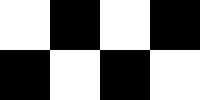

In [2]:
pix = [[1, 0, 1, 0], [0, 1, 0, 1]]
matrice_to_image([[1,0,1,0],[0,1,0,1]], mode = '1', fichier='exemple_binaire_4x2.png',res=50)

* Histoire 

Le Portable Network Graphics (PNG) est un format ouvert d’images numériques, qui a été créé pour remplacer le format GIF, à l’époque propriétaire et dont la compression était soumise à un brevet. Le PNG est un format sans perte spécialement adapté pour publier des images simples comprenant des aplats de couleurs.  


* Pour les images synthétiques

PNG est particulièrement approprié lorsqu’il s’agit d’enregistrer des images synthétiques destinées au Web comme des graphiques, des icônes, des images représentant du texte (bonne conservation de la lisibilité), ou des images avec des dégradés. Le PNG surpasse régulièrement le format GIF en ce qui concerne la réduction de la taille des fichiers (avec une palette de couleurs bien choisie) ou la qualité (puisqu’il n’est pas limité à 256 couleurs).

* Pour les photos

Les caractéristiques de PNG lui permettent d’enregistrer des photographies sans perte de données, au détriment de la taille du fichier qui reste logiquement très supérieure à celle de formats avec perte de données destinés aux photographies, comme JPEG ou JPEG 2000. 


*Source :*  <https://fr.wikipedia.org/wiki/Portable_Network_Graphics>

![Analyse de fichier PNG](https://capytale2.ac-paris.fr/web/sites/default/files/2021-11-15-15-57-15//mcer_VBB09066/analyse-fichierpng.png)

# Exemples du point méthode 1

In [3]:
#%% Exemples du point Méthode pages 3, 4 et 5

#%% Définition de tableaux à plusieurs dimensions

t1 = [[1,2], [3,4]]     #tableau/matrice à 2 dimensions
print("t1 = [[1,2], [3,4]] ", "affichage : ",t1, sep ="\n")

print('*' * 80)

t2 = [[1,2], [3,4],[5,6,7]] #tableau à 2 dimensions
print("t2 = [[1,2], [3,4],[5,6,7]]", "affichage : ",t2, sep ="\n")

print('*' * 80)

t3 = [[[1], [2,3]],[4,5,6],[7]]  #tableau mixte 
print("t3 = [[[1], [2,3]],[4,5,6],[7]]", "affichage : ",t3, sep="\n")

print('*' * 80)

print("Longueur de t2 : ", "affichage : ",len(t2), sep="\n")    #t2 contient 2 tableaux éléments
print("Longueur de la première ligne de t2 notée t2[0] ", "affichage : ",len(t2[0]), sep="\n")#t2[0] est un tableau contenant 2 entiers
print("Longueur de la troisième ligne de t2 notée t2[2] ", "affichage : ",len(t2[2]), sep="\n")


print('*' * 80)

t4 = [[0] * 3 for _ in range(2)]
print("t4 = [[0] * 3 for _ in range(2)]", "affichage : ",t4, sep ="\n")

print('*' * 80)

t5 = [[ [0] * 4 for i in range(3)] for j in range(2)]
print("t5 = [[ [0] * 4 for i in range(3)] for j in range(2)]", "affichage : ",t5, sep ="\n")

#%% Parcours de tableaux à plusieurs dimensions
print('*' * 80)
def parcours_tableau2d_index(tab):
    """Parcours par index d'un tableau à 2 dimensions"""
    for i in range(len(tab)):
        for j in range(len(tab[i])):
            print('Element en ligne {} colonne {} : '.format(i,j),tab[i][j])
            
def parcours_tableau2d_element(tab):
    """Parcours par élément d'un tableau à 2 dimensions"""
    for ligne in tab:
        for element in ligne:
            print(element)

print("Parcours de t1 par index :", "Affichage : ", sep ="\n")
print(t1)
print("Parcours : ")
parcours_tableau2d_index(t1)

print('*' * 80)
print("Parcours de t1 par élément :", "Affichage : ", sep ="\n")
print(t1)
print("Parcours : ")
parcours_tableau2d_element(t1)

t1 = [[1,2], [3,4]] 
affichage : 
[[1, 2], [3, 4]]
********************************************************************************
t2 = [[1,2], [3,4],[5,6,7]]
affichage : 
[[1, 2], [3, 4], [5, 6, 7]]
********************************************************************************
t3 = [[[1], [2,3]],[4,5,6],[7]]
affichage : 
[[[1], [2, 3]], [4, 5, 6], [7]]
********************************************************************************
Longueur de t2 : 
affichage : 
3
Longueur de la première ligne de t2 notée t2[0] 
affichage : 
2
Longueur de la troisième ligne de t2 notée t2[2] 
affichage : 
3
********************************************************************************
t4 = [[0] * 3 for _ in range(2)]
affichage : 
[[0, 0, 0], [0, 0, 0]]
********************************************************************************
t5 = [[ [0] * 4 for i in range(3)] for j in range(2)]
affichage : 
[[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]]
***********

# Exercice 2

In [4]:
def max_tab2d(tab):
    """Retourne le maximum d'un tableau à 2 dimensions"""
    maxi = float('-inf')
    for y in range(len(tab)): #boucle sur les lignes
        for x in range(len(tab[y])): # boucle sur les colonnes
            if tab[y][x] > maxi:
                maxi = tab[y][x]
    return maxi

# Assertions à vérifier



assert max_tab2d([[-1,-2],[-2,-3,-0.5]]) == -0.5
assert max_tab2d([[1,2],[float('inf'),10]]) == float('inf')
assert max_tab2d([[1,2],[8,0]]) == 8

In [5]:
def moyenne_tab2d(tab):
    """Retourne la moyenne d'un tableau de nombres à 2 dimensions"""
    somme = 0
    nbelement = 0
    for y in range(len(tab)): #boucle sur les lignes
        for x in range(len(tab[y])): # boucle sur les colonnes
            somme = somme + tab[y][x]
            nbelement = nbelement + 1
    return somme / nbelement


assert moyenne_tab2d([[-1,-2],[-2,-3,-0.5]]) == -1.7
assert moyenne_tab2d([[1,2],[float('inf'),10]]) == float('inf')
assert moyenne_tab2d([[1,2],[8,0]]) == 2.75
assert moyenne_tab2d([[8, float('-inf')],[]]) == float('-inf')

# Exercice 4

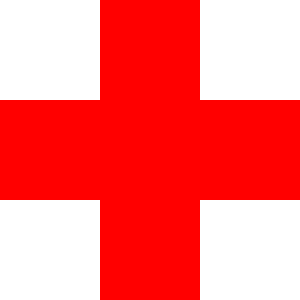

In [6]:
def generer_croix(couleur):
    """Paramètre : couleur un tableau de 3 entiers entre 0 et 255
    Valeur renvoyée : Image au format PIL représentant une croix sur fonds
    blanc de la couleur passée en paramètre    
    """
    blanc = [255,255,255]
    croix = [[blanc, couleur, blanc],[couleur] * 3,[blanc, couleur, blanc]]
    im = matrice_to_image(croix, mode = 'RGB', res = 100, fichier='croix.png')  
    return im

# test
generer_croix([255,0,0])

# Exercice 5

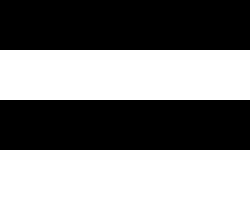

In [7]:
def barres_horizontales(nlig, ncol):
    """Retourne la matrice de pixels d'une image
    de dimensions ncol x nlig avec alternance 
    de lignes noires (index pair)
    ou blanches (index impair)"""
    #on crée une matrice vide de bonnes dimensions
    pix = matrice_nulle(ncol, nlig, '1')
    for x in range(ncol): #boucle sur les colonnes
        for y in range(nlig): #boucle sur les lignes
            #les lignes d'index paires seront noires
            pix[y][x] = y % 2
    return pix 

# test 
matrice_to_image(barres_horizontales(4, 5), fichier = 'bandes-horizontales.png', mode='1', res = 50)

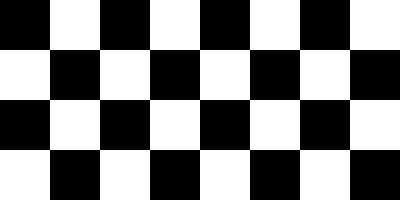

In [8]:
def damier(nlig, ncol):
    """Retourne la matrice de pixels de l'image binaire d'un damier
    ligne et colonne de même parité : blanc   sinon : noir
    """
    pix = matrice_nulle(ncol, nlig, '1')
    for x in range(ncol): #boucle sur les colonnes
        for y in range(nlig): #boucle sur les lignes
            if y % 2 == x % 2:
                pix[y][x] = 0
            else:
                pix[y][x] = 1
    return pix
    
# test
matrice_to_image(damier(4,8), fichier="damier.png", mode='1', res = 50) 


# Exercice 6

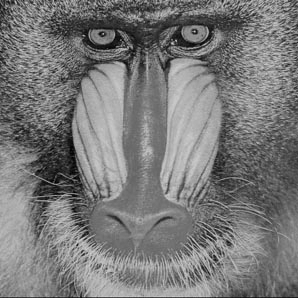

In [9]:
from typing import List 

def luminance(rgb:List[int])->int:
    """Paramètre : un tableau de 3 entiers [r,g,b]
    Précondition : 0 <= r < 255 et 0 <= g < 255 et 0 <= b < 255 
    Valeur renvoyée : un entier
    Postcondition : renvoie la luminance 0.299*r+0.587*g+0.114*b"""     
    r, g, b = rgb
    assert 0 <= r <= 255 and 0 <= g <= 255 and 0 <= b <= 255
    return int(0.299*r + 0.587*g + 0.114*b)

def matrice_rgb_to_gris(pix:List[List[List[int]]])->List[List[int]]:
    """Précondition: pix une matrice de pixels rgb
    Valeur renvoyée: une matrice de pixels en niveaux de gris
    Postcondition : renvoie une matrice des luminances des pixels sources
    """
    ncol, nlig = dimensions(pix)
    pix_but = matrice_nulle(ncol, nlig)
    for i in range(nlig):
        for j in range(ncol):
            pix_but[i][j] = luminance(pix[i][j])
    return pix_but
            
#test
mandrill_rgb = image_to_matrice('mandrill.png')
mandrill_gris = matrice_rgb_to_gris(mandrill_rgb)
matrice_to_image(mandrill_gris, mode = 'L', fichier='mandrill_gris.png', res=1)

In [10]:
from typing import List

def melange_pixel_gris(p1:int, p2:int, coef:float)->int:
    """Précondition : 0 <= p1 < 255 et 0 <= p2 < 255 et 0 <= coef <= 1
    Postcondition : renvoie int(p1 * coef + (1-coef) * p2)"""
    assert  0 <= p1 < 255 and 0 <= p2 < 255 and 0 <= coef <= 1
    return int(p1 * coef + (1-coef) * p2)

def melange_matrice_gris(pix1:List[List[int]], pix2:List[List[int]], coef:float)->List[List[int]]:
    """Précondition : pix1 et pix2 deux matrices de pixels en niveaux de gris
    de mêmes dimensions et 0 <= coef <= 1"""
    assert  0 <= coef <= 1
    ncol, nlig = dimensions(pix1)
    assert nlig, ncol == dimensions(pix2)
    pix3 = matrice_nulle(ncol, nlig)
    for i in range(nlig):
        for j in range(ncol):
            pix3[i][j] = melange_pixel_gris(pix1[i][j], pix2[i][j], coef)
    return pix3

def melange_progressif(pix1:List[List[int]], pix2:List[List[int]], n:int)->None:
    for k in range(n):
        im = matrice_to_image(melange_matrice_gris(pix1, pix2,  k/n), mode='L', fichier=f"melange{k}.png")
        im.show()


darwin = image_to_matrice("darwin_gris.png")
mandrill = image_to_matrice("mandrill_gris.png")
melange_progressif(darwin, mandrill, 10)

# Exercice 7

In [11]:
from  typing import List

def changement_echelle(pix:List[List[int]], coef:float)->List[List[int]]:
    """Précondition: pix une matrice de pixels rgb
    Valeur renvoyée: une matrice de pixels en niveaux de gris
    Postcondition : renvoie une matrice de l'image obtenue par changement d'échelle
    de coefficient coef"""
    ncol, nlig = dimensions(pix)
    ncol_but, nlig_but = int(ncol * coef), int(nlig * coef)
    pix_but = matrice_nulle(ncol_but, nlig_but)
    for i in range(nlig_but):
        for j in range(ncol_but):
            pix_but[i][j] = pix[int(i/coef)][int(j/coef)]
    return pix_but

# tests
mandrill_gris = image_to_matrice('mandrill_gris.png')
im = matrice_to_image(mandrill_gris, mode = 'L')
im.show()
mandrill_gris_double = changement_echelle(mandrill_gris, 2)
im_double = matrice_to_image(mandrill_gris_double , mode = 'L', fichier='mandrill_gris_double.png', res=1)
im_double.show()
mandrill_gris_quart = changement_echelle(mandrill_gris, 0.25)
im_quart = matrice_to_image(mandrill_gris_quart, mode = 'L', fichier='mandrill_gris_quart.png', res=1)
im_quart.show()